In [233]:
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize
1. File path where the input data files reside.
2. Dictionary of major airports consisting of IATA airport codes and airport city names

In [234]:
# Assign the directory of the input data files to a variable
input_data_path = 'Resources/'

# Since we are only interested in data related to major airports, create a dictionary of major
# airports with the states they are located in. This is useful for later analysis by state.
major_airports = {'ATL': 'GA',
                  'AUS': 'TX',
                  'BNA': 'TN',
                  'BOS': 'MA',
                  'BWI': 'MD',
                  'CLT': 'NC',
                  'DCA': 'VA',
                  'DEN': 'CO',
                  'DFW': 'TX',
                  'DTW': 'MI',
                  'EWR': 'NJ',
                  'FLL': 'FL',
                  'IAD': 'VA',
                  'IAH': 'TX',
                  'JFK': 'NY',
                  'LAS': 'NV',
                  'LAX': 'CA',
                  'LGA': 'NY',
                  'MCO': 'FL',
                  'MDW': 'IL',
                  'MIA': 'FL',
                  'MSP': 'MN',
                  'ORD': "IL",
                  'PHL': 'PA',
                  'PHX': 'AZ',
                  'SAN': 'CA',
                  'SEA': 'WA',
                  'SFO': 'CA',
                  'SLC': 'UT',
                  'TPA': 'FL'}


# Step 1: Import Data
There are three sets of data:
1. Flight data  
   Flight data is retrieved from the `On_Time_Marketing_Carrier_On_Time_Performance_(Beginning_January_2018)_*.csv` files in the `Resources/` folder.
   There is a file for each month between January 2018 and December 2023. Each file contains a list of all US domestic commercial flights in that month.
   We will use these files to retrieve the number of flights, the flight delays and the cancelled flights.  
   The source for this data is the Bureau of Transportation Statistics of the United States Department of Transportation at
   https://www.transtats.bts.gov/DL_SelectFields.aspx?gnoyr_VQ=FGK&QO_fu146_anzr=b0-gvzr as accessed between 4/8/2024 and 4/17/2024.  
   A file for each year and month between January 2018 and December 2023 was downloaded separately.
2. Number of passengers  
   That data is retrieved from the `*_Passengers_*.csv` files. There is a file for each of the major US airports. Each file contains the number of passengers
   that enplaned from that airport each month starting in October of 2002 until December of 2023. We will use these files to retrieve passenger volumes.  
   The source for this data is the Bureau of Transportation Statistics of the United States Department of Transportation at
   https://www.transtats.bts.gov/Data_Elements.aspx?Data=2 as accessed between 4/8/2024 and 4/17/2024.
   A file for each majior US airport was downloaded separately.
3. Average Airfares  
   The quarterly average airfare is retrieved from the `AverageFare_Q*.csv` files. There is a file for each quarter from Q1 of 2018 to Q3 of 2023. It contains
   the average airfare for each US airport.  
   **Note:** These files were not available in `.csv` format from the source. They were only available in a "pseudo' Excel format that was not recognized by
   the Pandas `read_excel` function. We therefore converted them to `.csv` files manually.  
   The source for this data is the Bureau of Transportation Statistics of the United States Department of Transportation at
   (https://www.transtats.bts.gov/AverageFare/) as accessed between 4/8/2024 and 4/17/2024.  
   A file for each quarter from Q1 of 2018 to Q3 of 2023 was downloaded separately.

The following code imports these file sets in turn.

## 1.1. Import Flight Data
**Note:** We use the Python `glob` library to retrieve a list of files to read. We learned about `glob` from https://www.geeksforgeeks.org/how-to-use-glob-function-to-find-files-recursively-in-python/ as accessed on 4/12/2024.

In [235]:
# Create a list that contains the flights file names
flights_files = glob.glob(f'{input_data_path}On_Time_Marketing_Carrier_On_Time_Performance_(Beginning_January_2018)_*.csv')

# for file in flights_files:
#     print(file)

In [236]:
# Initialize a list to hold the DataFrames from the processed files. All the DataFrames from
# this list will be concatenated into a big DataFrame containing data for all flights from
# 01/01/2018 to 12/31/2023.
flights_dataframes = []

# Loop over the files in the flight files list and process the data in each file
# i = 0
for file in flights_files:

    # Read the file into a DataFrame
    print(f'Processing file {file}...')
    try:
        df = pd.read_csv(f'{file}', low_memory=False)
        print('   Success.')
    except Exception as error:
        print('   Read failed.')
        print('   Error:', error)

    # Strip out any leading or trailing whitespace from column names and make sure columns
    # are lower case
    df.rename(columns = {name:name.strip().lower() for name in df.columns}, inplace=True)

    # # Keep only flights that arrive at one of the major airports
    # df = df.loc[df['dest'].isin(major_airports.keys())]

    # Assign list of columns to keep for later
    columns_to_keep = ['year',
                       'quarter',
                       'month',
                       'dayofmonth',
                       'dayofweek',
                       'flightdate',
                       'iata_code_marketing_airline',
                       'flight_number_marketing_airline',
                       'operating_airline',
                       'iata_code_operating_airline',
                       'flight_number_operating_airline',
                       'origin',
                       'origincityname',
                       'originstate',
                       'dest',
                       'destcityname',
                       'deststate',
                       'depdelay',
                       'depdelayminutes',
                       'arrdelay',
                       'arrdelayminutes',
                       'cancelled',
                       'cancellationcode']
    
    # Keep only columns we want to keep for later
    # Keep only flights (rows) that arrive at one of the major airports
    df = df[columns_to_keep].loc[df['dest'].isin(major_airports.keys())]

    # Drop any duplicates
    df = df.drop_duplicates()

    # Append current DataFrame to list of DataFrames
    flights_dataframes.append(df)

    # if i < 3:
    #     print(f'Dataframe for input file {file}:')
    #     print(f'Shape: {flights_dataframes[i].shape}')
    #     print('First five rows')
    #     display(flights_dataframes[i].head())
    #     print('Last five rows')
    #     display(flights_dataframes[i].tail())
    #     print('\n' + '='*300 + '\n')

    # i += 1

# Concatenate all DataFrames into a big DataFrame and reset the index
df_flights = pd.concat(flights_dataframes).reset_index(drop=True)

# print('\n' + '+'*300 + '\n')
# print('+'*300 + '\n')
# print('Concatenated DataFrame:')
# print('First five lines:')
# display(df_flights.head())
# print('\n' + '='*300 + '\n')
# print('End of DataFrame 0 and beginning of DataFrame 1:')
# display(df_flights.iloc[397076:397086, :])
# print('\n' + '='*300 + '\n')
# print('End of DataFrame 1 and beginning of DataFrame 2:')
# display(df_flights.iloc[823480:823490, :])
# print('\n' + '='*300 + '\n')
# print('End of concatenated DataFrame:')
# display(df_flights.tail())
# print(f'Shape of concatenated DataFrame: {df_flights.shape}')

# display(df.tail())
display(df_flights.tail())
display(df_flights.columns)

Processing file Resources\On_Time_Marketing_Carrier_On_Time_Performance_(Beginning_January_2018)_2018_1.csv...
   Success.
Processing file Resources\On_Time_Marketing_Carrier_On_Time_Performance_(Beginning_January_2018)_2018_10.csv...
   Success.
Processing file Resources\On_Time_Marketing_Carrier_On_Time_Performance_(Beginning_January_2018)_2018_11.csv...
   Success.
Processing file Resources\On_Time_Marketing_Carrier_On_Time_Performance_(Beginning_January_2018)_2018_12.csv...
   Success.
Processing file Resources\On_Time_Marketing_Carrier_On_Time_Performance_(Beginning_January_2018)_2018_2.csv...
   Success.
Processing file Resources\On_Time_Marketing_Carrier_On_Time_Performance_(Beginning_January_2018)_2018_3.csv...
   Success.
Processing file Resources\On_Time_Marketing_Carrier_On_Time_Performance_(Beginning_January_2018)_2018_4.csv...
   Success.
Processing file Resources\On_Time_Marketing_Carrier_On_Time_Performance_(Beginning_January_2018)_2018_5.csv...
   Success.
Processing fi

,year,quarter,month,dayofmonth,dayofweek,flightdate,iata_code_marketing_airline,flight_number_marketing_airline,operating_airline,iata_code_operating_airline,...,originstate,dest,destcityname,deststate,depdelay,depdelayminutes,arrdelay,arrdelayminutes,cancelled,cancellationcode
26403679,2023,3,9,1,5,2023-09-01,UA,3416,YX,YX,...,NJ,DTW,"Detroit, MI",MI,-2.0,0.0,-32.0,0.0,0.0,NaN
26403680,2023,3,9,1,5,2023-09-01,UA,3410,YX,YX,...,ME,EWR,"Newark, NJ",NJ,-8.0,0.0,-14.0,0.0,0.0,NaN
26403681,2023,3,9,1,5,2023-09-01,UA,3409,YX,YX,...,NC,EWR,"Newark, NJ",NJ,-9.0,0.0,-8.0,0.0,0.0,NaN
26403682,2023,3,9,1,5,2023-09-01,UA,3404,YX,YX,...,NJ,DTW,"Detroit, MI",MI,-7.0,0.0,-31.0,0.0,0.0,NaN
26403683,2023,3,9,1,5,2023-09-01,UA,3403,YX,YX,...,SC,IAD,"Washington, DC",VA,-6.0,0.0,-17.0,0.0,0.0,NaN


Index(['year', 'quarter', 'month', 'dayofmonth', 'dayofweek', 'flightdate',
       'iata_code_marketing_airline', 'flight_number_marketing_airline',
       'operating_airline', 'iata_code_operating_airline',
       'flight_number_operating_airline', 'origin', 'origincityname',
       'originstate', 'dest', 'destcityname', 'deststate', 'depdelay',
       'depdelayminutes', 'arrdelay', 'arrdelayminutes', 'cancelled',
       'cancellationcode'],
      dtype='object')

In [257]:
# # Convert 'flightdate' to datetime
# df_flights['flightdate'] = pd.to_datetime(df_flights['flightdate'], format='mixed')

# Convert 'year', 'quarter', 'month', 'dayofmonth', 'dayofweek' to integers to allow for proper merging with other DataFrames.
df_flights[['year', 'quarter', 'month', 'dayofmonth', 'dayofweek']] = df_flights[['year', 'quarter', 'month', 'dayofmonth', 'dayofweek']].astype(int)
display(df_flights.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26403684 entries, 0 to 26403683
Data columns (total 23 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   year                             int32  
 1   quarter                          int32  
 2   month                            int32  
 3   dayofmonth                       int32  
 4   dayofweek                        int32  
 5   flightdate                       object 
 6   iata_code_marketing_airline      object 
 7   flight_number_marketing_airline  int64  
 8   operating_airline                object 
 9   iata_code_operating_airline      object 
 10  flight_number_operating_airline  int64  
 11  origin                           object 
 12  origincityname                   object 
 13  originstate                      object 
 14  dest                             object 
 15  destcityname                     object 
 16  deststate                        object 
 17  depdel

None

## 1.2. Import Passenger Enplanement Data

In [258]:
# Create a list of the input files that contain passengers data
passengers_files = glob.glob(f'{input_data_path}*_Passengers_*.csv')

# for file in passengers_files:
#     print(file)

In [259]:
# Initialize a list to hold the DataFrames from the processed files. All the DataFrames from
# this list will be concatenated into a big DataFrame containing data for all monthly passenger
# enplanements from January 2018 to December 2023.
passengers_dataframes = []

# Loop over the files in the passengers files list and process the data in each file
# i = 0
for file in passengers_files:

    # Read the passengers file into a DataFrame.
    # Skip the first row in each file since it is a header row we do not need
    print(f'Processing file {file}...')
    # Retrieve IATA airport code from filename
    airport = file[len(input_data_path):len(input_data_path)+3]
    # print(airport)

    # Make sure airport is a major airport (is in the dictionary of major airports)
    if airport in major_airports.keys():
        try:
            df = pd.read_csv(f'{file}',
                             skiprows=1,
                             engine='python')
            print('   Success.')
        except Exception as error:
            print('   Read failed.')
            print('   Error:', error)

        # Keep only columns 'Year', 'Month', and 'Domestic' (for domestic passengers)
        # Keep only rows where the value of the 'Month' field is not equal to 'TOTAL',
        # the 'Year' has a numeric value and is larger than 2017
        df = df[['Year', 'Month', 'DOMESTIC']][(df['Month'] != 'TOTAL') &
                                               (df['Year'].str.isnumeric() == True) &
                                               (df['Year'] > '2017')]
        
        # Add a column called 'Origin' containing the origin airport IATA code
        df['Origin'] = airport

        # Drop any duplicates
        df = df.drop_duplicates() 

        # Append current DataFrame to list of DataFrames
        passengers_dataframes.append(df)

        # if (airport == 'ATL') or (airport == 'AUS') or (airport == 'BNA'):
        #     print(f'Dataframe of file {file}:')
        #     print(f'Shape: {passengers_dataframes[i].shape}')
        #     print('First five rows')
        #     display(passengers_dataframes[i].head())
        #     print('Last five rows')
        #     display(passengers_dataframes[i].tail())
        #     print('\n' + '='*300 + '\n')

        # i += 1
    else:
        print(f'The airport {airport} was not found.')

# Concatenate all DataFrames into a big DataFrame and reset the index
df_passengers = pd.concat(passengers_dataframes).reset_index(drop=True)

# print('\n' + '+'*300 + '\n')
# print('+'*300 + '\n')
# print('Concatenated DataFrame:')
# print('First five lines:')
# display(df_passengers.head())
# print('\n' + '='*300 + '\n')
# print('End of DataFrame 0 and beginning of DataFrame 1:')
# display(df_passengers.iloc[67:77, :])
# print('\n' + '='*300 + '\n')
# print('End of DataFrame 1 and beginning of DataFrame 2:')
# display(df_passengers.iloc[139:149, :])
# print('\n' + '='*300 + '\n')
# print('End of concatenated DataFrame:')
# display(df_passengers.tail())
# print(f'Shape of concatenated DataFrame: {df_passengers.shape}')

# display(df.tail())
display(df_passengers.tail())
display(df_passengers.shape)
display(df_passengers.columns)

Processing file Resources\ATL_Passengers_4_10_2024 1_20_52 PM.csv...
   Success.
Processing file Resources\AUS_Passengers_4_10_2024 2_18_16 PM.csv...
   Success.
Processing file Resources\BNA_Passengers_4_10_2024 2_21_25 PM.csv...
   Success.
Processing file Resources\BOS_Passengers_4_10_2024 1_58_33 PM.csv...
   Success.
Processing file Resources\BWI_Passengers_4_10_2024 2_15_11 PM.csv...
   Success.
Processing file Resources\CLT_Passengers_4_10_2024 1_48_19 PM.csv...
   Success.
Processing file Resources\DCA_Passengers_4_10_2024 2_11_18 PM.csv...
   Success.
Processing file Resources\DEN_Passengers_4_10_2024 1_34_52 PM.csv...
   Success.
Processing file Resources\DFW_Passengers_4_10_2024 1_25_49 PM.csv...
   Success.
Processing file Resources\DTW_Passengers_4_10_2024 2_06_01 PM.csv...
   Success.
Processing file Resources\EWR_Passengers_4_10_2024 1_53_01 PM.csv...
   Success.
Processing file Resources\FLL_Passengers_4_10_2024 2_01_28 PM.csv...
   Success.
Processing file Resources\IA

,Year,Month,DOMESTIC,Origin
2155,2023,8,"803,898",TPA
2156,2023,9,"789,879",TPA
2157,2023,10,"914,515",TPA
2158,2023,11,"956,988",TPA
2159,2023,12,"982,672",TPA


(2160, 4)

Index(['Year', 'Month', 'DOMESTIC', 'Origin'], dtype='object')

In [260]:
# Convert 'Year' and 'Month' to integers to allow for proper merging with other DataFrames.
df_passengers[['Year', 'Month']] = df_passengers[['Year', 'Month']].astype(int)
display(df_passengers.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160 entries, 0 to 2159
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Year      2160 non-null   int32 
 1   Month     2160 non-null   int32 
 2   DOMESTIC  2160 non-null   object
 3   Origin    2160 non-null   object
dtypes: int32(2), object(2)
memory usage: 50.8+ KB


None

In [261]:
# Convert the 'DOMESTIC' column to an integer. It contains the number of domestic
# passengers which we will aggregate later. 

# First, remove the ',' in the string
df_passengers['DOMESTIC'] = df_passengers['DOMESTIC'].str.replace(",", "")

# Now we can convert it to an integer
df_passengers['DOMESTIC'] = df_passengers['DOMESTIC'].astype(int)
display(df_passengers.info())
display(df_passengers.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160 entries, 0 to 2159
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Year      2160 non-null   int32 
 1   Month     2160 non-null   int32 
 2   DOMESTIC  2160 non-null   int32 
 3   Origin    2160 non-null   object
dtypes: int32(3), object(1)
memory usage: 42.3+ KB


None

,Year,Month,DOMESTIC,Origin
0,2018,1,3232202,ATL
1,2018,2,3204716,ATL
2,2018,3,3965168,ATL
3,2018,4,3844151,ATL
4,2018,5,4081926,ATL


## 1.3. Import Fare Data

In [269]:
# Create a list of the input files that contain fares data
fares_files = glob.glob(f'{input_data_path}AverageFare_Q*.csv')

# for file in fares_files:
#     print(file)

In [270]:
# Initialize a list to hold the DataFrames from the processed files. All the DataFrames from
# this list will be concatenated into a big DataFrame containing data for all quarterly fare
# averages from Q1 2018 to Q3 2023.
fares_dataframes = []

# Loop over the files in the fares files list and process the data in each file
# i = 0
for file in fares_files:

    # Read the fares file into a DataFrame.
    print(f'Processing file {file}...')

    try:
        df = pd.read_csv(f'{file}')
        print('   Success.')
    except Exception as error:
        print('   Read failed.')
        print('   Error:', error)

    # Keep only columns 'Quarter', 'Year', 'Airport Code', 'City Name',
    # 'Average Fare ($)', 'Inflation Adjusted Average Fare ($) (Base Quarter:  Q3-2023)'
    # Keep only fares (rows) that arrive at one of the major airports
    df = df[['Quarter',
            'Year',
            'Airport Code',
            'City Name',
            'Average Fare ($)',
            'Inflation Adjusted Average Fare ($) (Base Quarter:  Q3-2023)']].loc[df['Airport Code'].isin(major_airports.keys())]
    
    # Drop any duplicates
    df = df.drop_duplicates()

    # Append current DataFrame to list of DataFrames
    fares_dataframes.append(df)

    # if i<3:
    #     print(f'Dataframe of file {file}:')
    #     print(f'Shape: {fares_dataframes[i].shape}')
    #     print('First five rows')
    #     display(fares_dataframes[i].head())
    #     print('Last five rows')
    #     display(fares_dataframes[i].tail())
    #     print('\n' + '='*300 + '\n')

    # i += 1

# Concatenate all DataFrames into a big DataFrame and reset the index
df_fares = pd.concat(fares_dataframes).reset_index(drop=True)

# print('\n' + '+'*300 + '\n')
# print('+'*300 + '\n')
# print('Concatenated DataFrame:')
# print('First five lines:')
# display(df_fares.head())
# print('\n' + '='*300 + '\n')
# print('End of DataFrame 0 and beginning of DataFrame 1:')
# display(df_fares.iloc[25:35, :])
# print('\n' + '='*300 + '\n')
# print('End of DataFrame 1 and beginning of DataFrame 2:')
# display(df_fares.iloc[55:65, :])
# print('\n' + '='*300 + '\n')
# print('End of concatenated DataFrame:')
# display(df_fares.tail())
# print(f'Shape of concatenated DataFrame: {df_fares.shape}')

# display(df.tail())
display(df_fares.tail())
display(df_fares.shape)
display(df_fares.columns)

Processing file Resources\AverageFare_Q1_2018.csv...
   Success.
Processing file Resources\AverageFare_Q1_2019.csv...
   Success.
Processing file Resources\AverageFare_Q1_2020.csv...
   Success.
Processing file Resources\AverageFare_Q1_2021.csv...
   Success.
Processing file Resources\AverageFare_Q1_2022.csv...
   Success.
Processing file Resources\AverageFare_Q1_2023.csv...
   Success.
Processing file Resources\AverageFare_Q2_2018.csv...
   Success.
Processing file Resources\AverageFare_Q2_2019.csv...
   Success.
Processing file Resources\AverageFare_Q2_2020.csv...
   Success.
Processing file Resources\AverageFare_Q2_2021.csv...
   Success.
Processing file Resources\AverageFare_Q2_2022.csv...
   Success.
Processing file Resources\AverageFare_Q2_2023.csv...
   Success.
Processing file Resources\AverageFare_Q3_2018.csv...
   Success.
Processing file Resources\AverageFare_Q3_2019.csv...
   Success.
Processing file Resources\AverageFare_Q3_2020.csv...
   Success.
Processing file Resources

,Quarter,Year,Airport Code,City Name,Average Fare ($),Inflation Adjusted Average Fare ($) (Base Quarter: Q3-2023)
685,4.0,2022.0,BNA,Nashville,349.47,360.43
686,4.0,2022.0,SLC,Salt Lake City,439.50,453.28
687,4.0,2022.0,CLT,Charlotte,468.61,483.31
688,4.0,2022.0,MDW,Chicago-Midway,301.63,311.09
689,4.0,2022.0,IAD,Washington-Dulles,503.53,519.32


(690, 6)

Index(['Quarter', 'Year', 'Airport Code', 'City Name', 'Average Fare ($)',
       'Inflation Adjusted Average Fare ($) (Base Quarter:  Q3-2023)'],
      dtype='object')

In [271]:
# Rename the column 'Inflation Adjusted Average Fare ($) (Base Quarter:  Q3-2023)' to 'Inflation Adjusted Average Fare ($)'
df_fares = df_fares.rename(columns={'Inflation Adjusted Average Fare ($) (Base Quarter:  Q3-2023)': 'Inflation Adjusted Average Fare ($)'})

In [245]:
# # Convert columns 'Quarter' and 'Year' into integers
# df_fares[['Quarter', 'Year']] = df_fares[['Quarter', 'Year']].astype(int)

# display(df_fares.info())

# Step 2: Perform Basic Consistency Checks

In [248]:
# Count the number of values in each column of the 'df_flights' DataFrame
display(df_flights.count())
# The maximum of the column count values is equal to the total number of flights
# in our dataset
print(f'Total number of flights: {max(df_flights.count()):,}.')

year                               26403684
quarter                            26403684
month                              26403684
dayofmonth                         26403684
dayofweek                          26403684
flightdate                         26403684
iata_code_marketing_airline        26403684
flight_number_marketing_airline    26403684
operating_airline                  26403684
iata_code_operating_airline        26403684
flight_number_operating_airline    26403684
origin                             26403684
origincityname                     26403684
originstate                        26403684
dest                               26403684
destcityname                       26403684
deststate                          26403684
depdelay                           25797301
depdelayminutes                    25797301
arrdelay                           25722109
arrdelayminutes                    25722109
cancelled                          26403684
cancellationcode                

Total number of flights: 26,403,684.


Since the passenger enplanement raw data is aggregated by airport, year, and month,
we need to aggregate the flights data by airport, year, and month as well, so we can
properly correlate the data from different sources.

**Note:** As customers we are interested in arrival delays more than departure delays.
Therefore, we are picking the destination airport, 'dest', in our aggregation.

In [249]:
# Find the counts
df_flights_summary = df_flights.groupby(['year', 'month', 'dest']).count()
display(df_flights_summary.head())

# Perform consistency check: If we sum over the aggregation, we should get back the
# values obtained using the 'count()' function above. The index columns are not shown.
display(df_flights_summary.sum())

# Through manual inspection we see that our expectation is met.

quarter  dayofmonth  dayofweek  flightdate  \
year month dest                                               
2018 1     ATL     30730       30730      30730       30730   
           AUS      4713        4713       4713        4713   
           BNA      5789        5789       5789        5789   
           BOS     11306       11306      11306       11306   
           BWI      8560        8560       8560        8560   

                 iata_code_marketing_airline  flight_number_marketing_airline  \
year month dest                                                                 
2018 1     ATL                         30730                            30730   
           AUS                          4713                             4713   
           BNA                          5789                             5789   
           BOS                         11306                            11306   
           BWI                          8560                             8560   

                 operating_airline  iata_code_operating_airline  \
year month dest                                                   
2018 1     ATL               30730                        30730   
           AUS                4713                         4713   
           BNA                5789                         5789   
           BOS               11306                        11306   
           BWI                8560                         8560   

                 flight_number_operating_airline  origin  origincityname  \
year month dest                                                            
2018 1     ATL                             30730   30730           30730   
           AUS                              4713    4713            4713   
           BNA                              5789    5789            5789   
           BOS                             11306   11306           11306   
           BWI                              8560    8560            8560   

                 originstate  destcityname  deststate  depdelay  \
year month dest                                                   
2018 1     ATL         30730         30730      30730     29865   
           AUS          4713          4713       4713      4611   
           BNA          5789          5789       5789      5613   
           BOS         11306         11306      11306     10507   
           BWI          8560          8560       8560      8342   

                 depdelayminutes  arrdelay  arrdelayminutes  cancelled  \
year month dest                                                          
2018 1     ATL             29865     29833            29833      30730   
           AUS              4611      4607             4607       4713   
           BNA              5613      5595             5595       5789   
           BOS             10507     10492            10492      11306   
           BWI              8342      8333             8333       8560   

                 cancellationcode  
year month dest                    
2018 1     ATL                882  
           AUS                102  
           BNA                179  
           BOS                805  
           BWI                220

quarter                            26403684
dayofmonth                         26403684
dayofweek                          26403684
flightdate                         26403684
iata_code_marketing_airline        26403684
flight_number_marketing_airline    26403684
operating_airline                  26403684
iata_code_operating_airline        26403684
flight_number_operating_airline    26403684
origin                             26403684
origincityname                     26403684
originstate                        26403684
destcityname                       26403684
deststate                          26403684
depdelay                           25797301
depdelayminutes                    25797301
arrdelay                           25722109
arrdelayminutes                    25722109
cancelled                          26403684
cancellationcode                     618356
dtype: int64

Determine the number of flights by airport per year and month.
We can use any column that has a value count equal to 'total_flights' in the 'df_flights'
DataFrame. We are picking 'flight_number_marketing_airline'.

In [250]:
# Grab one column that contains a number of flights by year, month, and destination.
df_flights_summary = df_flights_summary[['flight_number_marketing_airline']]
display(df_flights_summary.head())
display(df_flights_summary.tail())

flight_number_marketing_airline
year month dest                                 
2018 1     ATL                             30730
           AUS                              4713
           BNA                              5789
           BOS                             11306
           BWI                              8560

flight_number_marketing_airline
year month dest                                 
2023 12    SAN                              7898
           SEA                             14043
           SFO                             11289
           SLC                              9361
           TPA                              7261

In [251]:
# Determine the number of records. It should be #years * #months per year * #airports.
# In our case, 6*12*30=2160. That is what we get.
df_flights_summary.count()

flight_number_marketing_airline    2160
dtype: int64

# Step 3: Prepare a Summary DataFrame for Visualization

## 3.1. Calculate the Average Arrival Delay by Year, Month and Airport

In [252]:
# Retrieve the arrival delay, 'arrdelayminutes' and drop any rows with invalid values
df_delay = df_flights[['year', 'month', 'dest', 'arrdelayminutes']].dropna()
# display(df_delay.head())

# Average over 'year', 'month', 'dest'.
df_delay_mean = df_delay.groupby(['year', 'month', 'dest']).mean()

# Merge average delay on arrival to the flights summary DataFrame
df_flights_summary = pd.merge(df_flights_summary, df_delay_mean,
                              how='inner',
                              on=['year', 'month', 'dest'])
display(df_flights_summary.head())
# display(df_flights_summary.tail())
display(df_flights_summary.count())

flight_number_marketing_airline  arrdelayminutes
year month dest                                                  
2018 1     ATL                             30730        14.578722
           AUS                              4713         8.968309
           BNA                              5789        11.015013
           BOS                             11306        18.417175
           BWI                              8560         9.094204

flight_number_marketing_airline    2160
arrdelayminutes                    2160
dtype: int64

## 3.2. Calculate Cancellations by Year, Month, and Airport.
To calculate the cancellations we sum over the 'cancelled' column of the 'df_flights' DataFrame
since, according to the data dictionary, it has a value of 1 when a flight is cancelled and a value
of 0 if it is not cancelled.

In [253]:
# Retrieve and sum over the cancelled flights.
df_cancelled = df_flights[['year', 'month', 'dest', 'cancelled']].groupby(['year', 'month', 'dest']).sum()
display(df_cancelled.head())
display(df_cancelled.tail())

# Merge cancelled flights to the flights summary DataFrame
df_flights_summary = pd.merge(df_flights_summary, df_cancelled,
                              how='inner',
                              on=['year', 'month', 'dest'])
display(df_flights_summary.head())
# display(df_flights_summary.tail())
display(df_flights_summary.count())

cancelled
year month dest           
2018 1     ATL       882.0
           AUS       102.0
           BNA       179.0
           BOS       805.0
           BWI       220.0

cancelled
year month dest           
2023 12    SAN        24.0
           SEA       109.0
           SFO        38.0
           SLC        16.0
           TPA        25.0

flight_number_marketing_airline  arrdelayminutes  cancelled
year month dest                                                             
2018 1     ATL                             30730        14.578722      882.0
           AUS                              4713         8.968309      102.0
           BNA                              5789        11.015013      179.0
           BOS                             11306        18.417175      805.0
           BWI                              8560         9.094204      220.0

flight_number_marketing_airline    2160
arrdelayminutes                    2160
cancelled                          2160
dtype: int64

## 3.3. Calculate the Percentage of Flights Cancelled
This allows for an easy comparison across airports, months, and years.

In [254]:
# Add a column for the cancellation percentage and calculate it
df_flights_summary['Cancelled %'] = df_flights_summary['cancelled']/df_flights_summary['flight_number_marketing_airline']*100

display(df_flights_summary.head())
display(df_flights_summary.count())

flight_number_marketing_airline  arrdelayminutes  cancelled  \
year month dest                                                                
2018 1     ATL                             30730        14.578722      882.0   
           AUS                              4713         8.968309      102.0   
           BNA                              5789        11.015013      179.0   
           BOS                             11306        18.417175      805.0   
           BWI                              8560         9.094204      220.0   

                 Cancelled %  
year month dest               
2018 1     ATL      2.870159  
           AUS      2.164227  
           BNA      3.092071  
           BOS      7.120113  
           BWI      2.570093

flight_number_marketing_airline    2160
arrdelayminutes                    2160
cancelled                          2160
Cancelled %                        2160
dtype: int64

## 3.4. Add the Number of Passengers

In [262]:
# Rename the columns in the 'df_passengers' DataFrame so that the columns we will use to merge with the
# 'df_flights_summary' DataFrame have the same names
df_passengers = df_passengers.rename(columns={'Year': 'year', 'Month': 'month', 'Origin': 'dest'})
display(df_passengers.head())

# Set the (multi) index
df_passengers = df_passengers.set_index(['year', 'month', 'dest'])
display(df_passengers.head())
display(df_passengers.tail())

# Merge passengers with the flights summary DataFrame
df_flights_summary = pd.merge(df_flights_summary, df_passengers[['DOMESTIC']],
                              how='inner',
                              on=['year', 'month', 'dest'])
display(df_flights_summary.head())
# display(df_flights_summary.tail())
display(df_flights_summary.count())

,year,month,DOMESTIC,dest
0,2018,1,3232202,ATL
1,2018,2,3204716,ATL
2,2018,3,3965168,ATL
3,2018,4,3844151,ATL
4,2018,5,4081926,ATL


DOMESTIC
year month dest          
2018 1     ATL    3232202
     2     ATL    3204716
     3     ATL    3965168
     4     ATL    3844151
     5     ATL    4081926

DOMESTIC
year month dest          
2023 8     TPA     803898
     9     TPA     789879
     10    TPA     914515
     11    TPA     956988
     12    TPA     982672

flight_number_marketing_airline  arrdelayminutes  cancelled  \
year month dest                                                                
2018 1     ATL                             30730        14.578722      882.0   
           AUS                              4713         8.968309      102.0   
           BNA                              5789        11.015013      179.0   
           BOS                             11306        18.417175      805.0   
           BWI                              8560         9.094204      220.0   

                 Cancelled %  DOMESTIC  
year month dest                         
2018 1     ATL      2.870159   3232202  
           AUS      2.164227    483324  
           BNA      3.092071    483139  
           BOS      7.120113   1027783  
           BWI      2.570093    882892

flight_number_marketing_airline    2160
arrdelayminutes                    2160
cancelled                          2160
Cancelled %                        2160
DOMESTIC                           2160
dtype: int64

## 3.5. Add the Airfare
The fares are only available by quarter, however, our other data is available by month.
Therefore, we will add a column for the month to the fares dataframe and use the data
for the quarter for each month in that quarter.

We learned how to apply the `np.repeat` function from https://www.statology.org/pandas-replicate-rows/ as accessed on 4/13/2024.

In [272]:
# Replicate each row three times since each quarter consists of three months
df_fares_monthly = pd.DataFrame(np.repeat(df_fares.values, 3, axis=0))

# Since this did not preserve the column labels, add them back
df_fares_monthly.columns = df_fares.columns
display(df_fares_monthly.head())

,Quarter,Year,Airport Code,City Name,Average Fare ($),Inflation Adjusted Average Fare ($)
0,1.0,2018.0,LAX,Los Angeles,336.93,415.52
1,1.0,2018.0,LAX,Los Angeles,336.93,415.52
2,1.0,2018.0,LAX,Los Angeles,336.93,415.52
3,1.0,2018.0,ORD,Chicago-O'Hare,341.14,420.71
4,1.0,2018.0,ORD,Chicago-O'Hare,341.14,420.71


In [273]:
# Sort by year and quarter
df_fares_monthly.sort_values(by=['Year', 'Quarter'], inplace=True)
display(df_fares_monthly.head())
display(df_fares_monthly.shape)

,Quarter,Year,Airport Code,City Name,Average Fare ($),Inflation Adjusted Average Fare ($)
0,1.0,2018.0,LAX,Los Angeles,336.93,415.52
1,1.0,2018.0,LAX,Los Angeles,336.93,415.52
2,1.0,2018.0,LAX,Los Angeles,336.93,415.52
3,1.0,2018.0,ORD,Chicago-O'Hare,341.14,420.71
4,1.0,2018.0,ORD,Chicago-O'Hare,341.14,420.71


(2070, 6)

Create a list of months

In [274]:
# Set a list of quarters equal to the 'Quarter' column in 'df_fares_monthly'
quarters = df_fares_monthly['Quarter'].to_list()

# Initialize a list for the months
months = []

# Loop over the list of quarters and create a list of months.
# The month is given by the remainder of dividing the index by three
# (giving 0, 1, 2) and adding 1 for Q1, 4 for Q2, 7 for Q3, and 10 for Q4.
# The set of numbers 1, 4, 7, and 10 is calculated by adding one to the product
# of the quarter number minus 1 and three.
for i in range(len(quarters)):
    months.append(i%3+((quarters[i]-1)*3+1))
    # print(f'Index: {i}, Quarter: {quarters[i]} Month: {months[i]}')

# Add the list of months as a column to the 'df_fares_monthly' dataframe.
df_fares_monthly['Month'] = months
display(df_fares_monthly.head())

,Quarter,Year,Airport Code,City Name,Average Fare ($),Inflation Adjusted Average Fare ($),Month
0,1.0,2018.0,LAX,Los Angeles,336.93,415.52,1.0
1,1.0,2018.0,LAX,Los Angeles,336.93,415.52,2.0
2,1.0,2018.0,LAX,Los Angeles,336.93,415.52,3.0
3,1.0,2018.0,ORD,Chicago-O'Hare,341.14,420.71,1.0
4,1.0,2018.0,ORD,Chicago-O'Hare,341.14,420.71,2.0


In [275]:
# # Rearrange the columns
# df_fares_monthly = df_fares_monthly[['Year',
#                                      'Quarter',
#                                      'Month',
#                                      'Airport Code',
#                                      'City Name',
#                                      'Average Fare ($)',
#                                      'Inflation Adjusted Average Fare ($)'
#                                    ]]
# display(df_fares_monthly.head())


In [276]:
# Prepare the 'df_flights_summary' DataFrame for merger with the 'df_fares_monthly'
# Dataframe by
#   * Resetting the index and
#   * Renaming the 'year', 'month', and 'dest' columns to 'Year', 'Month', and
#     'Airport Code'
df_flights_summary = df_flights_summary.reset_index()
df_flights_summary = df_flights_summary.rename(columns = {'year': 'Year',
                                                          'month': 'Month',
                                                          'dest': 'Airport Code'})
display(df_flights_summary.head())

,index,Year,Month,Airport Code,flight_number_marketing_airline,arrdelayminutes,cancelled,Cancelled %,DOMESTIC
0,0,2018,1,ATL,30730,14.578722,882.0,2.870159,3232202
1,1,2018,1,AUS,4713,8.968309,102.0,2.164227,483324
2,2,2018,1,BNA,5789,11.015013,179.0,3.092071,483139
3,3,2018,1,BOS,11306,18.417175,805.0,7.120113,1027783
4,4,2018,1,BWI,8560,9.094204,220.0,2.570093,882892


In [287]:
# Merge the 'df_fares_monthly' DataFrame and the 'df_flights_summary' DataFrame
# into the final summary DataFrame
df_summary = pd.merge(df_flights_summary, df_fares_monthly,
                      how='left',
                      left_on=['Year', 'Month', 'Airport Code'],
                      right_on=['Year', 'Month', 'Airport Code'])

display(df_summary.head())
display(df_summary.tail())

,index,Year,Month,Airport Code,flight_number_marketing_airline,arrdelayminutes,cancelled,Cancelled %,DOMESTIC,Quarter,City Name,Average Fare ($),Inflation Adjusted Average Fare ($)
0,0,2018,1,ATL,30730,14.578722,882.0,2.870159,3232202,1.0,Atlanta,361.16,445.4
1,1,2018,1,AUS,4713,8.968309,102.0,2.164227,483324,1.0,Austin,348.72,430.06
2,2,2018,1,BNA,5789,11.015013,179.0,3.092071,483139,1.0,Nashville,351.81,433.87
3,3,2018,1,BOS,11306,18.417175,805.0,7.120113,1027783,1.0,Boston,323.31,398.73
4,4,2018,1,BWI,8560,9.094204,220.0,2.570093,882892,1.0,Baltimore,310.95,383.47


,index,Year,Month,Airport Code,flight_number_marketing_airline,arrdelayminutes,cancelled,Cancelled %,DOMESTIC,Quarter,City Name,Average Fare ($),Inflation Adjusted Average Fare ($)
2155,2155,2023,12,SAN,7898,7.497965,24.0,0.303874,982726,NaN,NaN,NaN,NaN
2156,2156,2023,12,SEA,14043,9.450284,109.0,0.776187,1658110,NaN,NaN,NaN,NaN
2157,2157,2023,12,SFO,11289,15.414780,38.0,0.336611,1446506,NaN,NaN,NaN,NaN
2158,2158,2023,12,SLC,9361,9.066088,16.0,0.170922,979522,NaN,NaN,NaN,NaN
2159,2159,2023,12,TPA,7261,13.813806,25.0,0.344305,982672,NaN,NaN,NaN,NaN


In [288]:
# Add a 'State' column
df_summary['State'] = [major_airports[airport] for airport in df_summary['Airport Code'].to_list()]

display(df_summary.head())

,index,Year,Month,Airport Code,flight_number_marketing_airline,arrdelayminutes,cancelled,Cancelled %,DOMESTIC,Quarter,City Name,Average Fare ($),Inflation Adjusted Average Fare ($),State
0,0,2018,1,ATL,30730,14.578722,882.0,2.870159,3232202,1.0,Atlanta,361.16,445.4,GA
1,1,2018,1,AUS,4713,8.968309,102.0,2.164227,483324,1.0,Austin,348.72,430.06,TX
2,2,2018,1,BNA,5789,11.015013,179.0,3.092071,483139,1.0,Nashville,351.81,433.87,TN
3,3,2018,1,BOS,11306,18.417175,805.0,7.120113,1027783,1.0,Boston,323.31,398.73,MA
4,4,2018,1,BWI,8560,9.094204,220.0,2.570093,882892,1.0,Baltimore,310.95,383.47,MD


In [289]:
# Add a 'Year-Month' column. This will help with slicing the data
# print([f"{df_summary['Year'][i]}-{str(df_summary['Month'][i]).zfill(2)}" for i in df_summary.index])

df_summary['Year-Month'] = [f"{df_summary['Year'][i]}-{str(df_summary['Month'][i]).zfill(2)}" for i in df_summary.index]
display(df_summary.head())

,index,Year,Month,Airport Code,flight_number_marketing_airline,arrdelayminutes,cancelled,Cancelled %,DOMESTIC,Quarter,City Name,Average Fare ($),Inflation Adjusted Average Fare ($),State,Year-Month
0,0,2018,1,ATL,30730,14.578722,882.0,2.870159,3232202,1.0,Atlanta,361.16,445.4,GA,2018-01
1,1,2018,1,AUS,4713,8.968309,102.0,2.164227,483324,1.0,Austin,348.72,430.06,TX,2018-01
2,2,2018,1,BNA,5789,11.015013,179.0,3.092071,483139,1.0,Nashville,351.81,433.87,TN,2018-01
3,3,2018,1,BOS,11306,18.417175,805.0,7.120113,1027783,1.0,Boston,323.31,398.73,MA,2018-01
4,4,2018,1,BWI,8560,9.094204,220.0,2.570093,882892,1.0,Baltimore,310.95,383.47,MD,2018-01


In [290]:
# Fill in missing values in the 'Quarter' column
df_summary['Quarter'] = df_summary['Quarter'].fillna(4)

In [291]:
# Rearrange columns
df_summary = df_summary[['Year',
                         'Quarter',
                         'Month',
                         'Year-Month',
                         'Airport Code',
                         'City Name',
                         'State',
                         'flight_number_marketing_airline',
                         'DOMESTIC',
                         'arrdelayminutes',
                         'cancelled',
                         'Cancelled %',
                         'Average Fare ($)',
                         'Inflation Adjusted Average Fare ($)']]
display(df_summary.head())
display(df_summary.tail())

,Year,Quarter,Month,Year-Month,Airport Code,City Name,State,flight_number_marketing_airline,DOMESTIC,arrdelayminutes,cancelled,Cancelled %,Average Fare ($),Inflation Adjusted Average Fare ($)
0,2018,1.0,1,2018-01,ATL,Atlanta,GA,30730,3232202,14.578722,882.0,2.870159,361.16,445.4
1,2018,1.0,1,2018-01,AUS,Austin,TX,4713,483324,8.968309,102.0,2.164227,348.72,430.06
2,2018,1.0,1,2018-01,BNA,Nashville,TN,5789,483139,11.015013,179.0,3.092071,351.81,433.87
3,2018,1.0,1,2018-01,BOS,Boston,MA,11306,1027783,18.417175,805.0,7.120113,323.31,398.73
4,2018,1.0,1,2018-01,BWI,Baltimore,MD,8560,882892,9.094204,220.0,2.570093,310.95,383.47


,Year,Quarter,Month,Year-Month,Airport Code,City Name,State,flight_number_marketing_airline,DOMESTIC,arrdelayminutes,cancelled,Cancelled %,Average Fare ($),Inflation Adjusted Average Fare ($)
2155,2023,4.0,12,2023-12,SAN,NaN,CA,7898,982726,7.497965,24.0,0.303874,NaN,NaN
2156,2023,4.0,12,2023-12,SEA,NaN,WA,14043,1658110,9.450284,109.0,0.776187,NaN,NaN
2157,2023,4.0,12,2023-12,SFO,NaN,CA,11289,1446506,15.414780,38.0,0.336611,NaN,NaN
2158,2023,4.0,12,2023-12,SLC,NaN,UT,9361,979522,9.066088,16.0,0.170922,NaN,NaN
2159,2023,4.0,12,2023-12,TPA,NaN,FL,7261,982672,13.813806,25.0,0.344305,NaN,NaN


In [292]:
# Rename a bunch of columns to more user-friendly names
df_summary = df_summary.rename(columns={'Airport Code': 'Airport',
                                        'flight_number_marketing_airline': 'No. of Flights',
                                        'arrdelayminutes': 'Average Delay (Minutes)',
                                        'cancelled': 'Cancelled Flights',
                                        'DOMESTIC': 'Passengers',
                                        'City Name': 'City'})
display(df_summary.head())

,Year,Quarter,Month,Year-Month,Airport,City,State,No. of Flights,Passengers,Average Delay (Minutes),Cancelled Flights,Cancelled %,Average Fare ($),Inflation Adjusted Average Fare ($)
0,2018,1.0,1,2018-01,ATL,Atlanta,GA,30730,3232202,14.578722,882.0,2.870159,361.16,445.4
1,2018,1.0,1,2018-01,AUS,Austin,TX,4713,483324,8.968309,102.0,2.164227,348.72,430.06
2,2018,1.0,1,2018-01,BNA,Nashville,TN,5789,483139,11.015013,179.0,3.092071,351.81,433.87
3,2018,1.0,1,2018-01,BOS,Boston,MA,11306,1027783,18.417175,805.0,7.120113,323.31,398.73
4,2018,1.0,1,2018-01,BWI,Baltimore,MD,8560,882892,9.094204,220.0,2.570093,310.95,383.47


In [294]:
# Make sure all the data has the expected data type and round all floating point numbers
df_summary[['Year',
            'Quarter',
            'Month',
            'No. of Flights',
            'Cancelled Flights',
            'Passengers']] = df_summary[['Year',
                                         'Quarter',
                                         'Month',
                                         'No. of Flights',
                                         'Cancelled Flights',
                                         'Passengers']].astype('int64')
df_summary[['Average Delay (Minutes)',
            'Cancelled %']] = df_summary[['Average Delay (Minutes)',
                                          'Cancelled %']].astype(float).round(2)
df_summary[['Average Fare ($)',
            'Inflation Adjusted Average Fare ($)']] = df_summary[['Average Fare ($)',
                                                                  'Inflation Adjusted Average Fare ($)']].astype(float).round(2)
display(df_summary.info())
display(df_summary.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160 entries, 0 to 2159
Data columns (total 14 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Year                                 2160 non-null   int64  
 1   Quarter                              2160 non-null   int64  
 2   Month                                2160 non-null   int64  
 3   Year-Month                           2160 non-null   object 
 4   Airport                              2160 non-null   object 
 5   City                                 2070 non-null   object 
 6   State                                2160 non-null   object 
 7   No. of Flights                       2160 non-null   int64  
 8   Passengers                           2160 non-null   int64  
 9   Average Delay (Minutes)              2160 non-null   float64
 10  Cancelled Flights                    2160 non-null   int64  
 11  Cancelled %                   

None

,Year,Quarter,Month,Year-Month,Airport,City,State,No. of Flights,Passengers,Average Delay (Minutes),Cancelled Flights,Cancelled %,Average Fare ($),Inflation Adjusted Average Fare ($)
0,2018,1,1,2018-01,ATL,Atlanta,GA,30730,3232202,14.58,882,2.87,361.16,445.40
1,2018,1,1,2018-01,AUS,Austin,TX,4713,483324,8.97,102,2.16,348.72,430.06
2,2018,1,1,2018-01,BNA,Nashville,TN,5789,483139,11.02,179,3.09,351.81,433.87
3,2018,1,1,2018-01,BOS,Boston,MA,11306,1027783,18.42,805,7.12,323.31,398.73
4,2018,1,1,2018-01,BWI,Baltimore,MD,8560,882892,9.09,220,2.57,310.95,383.47


# Step 4: Data Visualization

<Axes: xlabel='Year'>

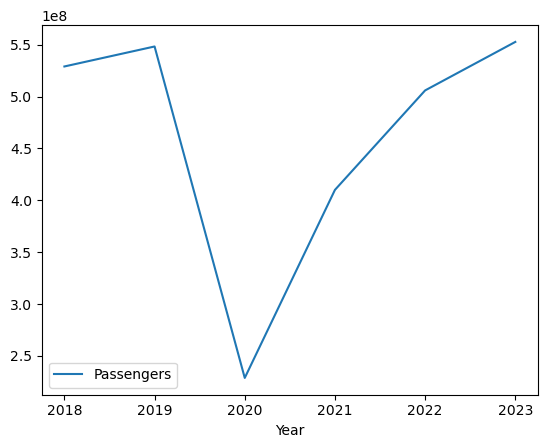

In [295]:
# Plot the number of passengers in a year by year
df_summary[['Year', 'Passengers']].groupby(['Year']).sum().plot()

In [297]:
# Zoom into years 2020-2022 since Covid 19 restrictions started in 2020 and passenger numbers had pretty much recovered at the end of 2022.
df_year = df_summary.loc[(df_summary['Year-Month']>'2019-12') & (df_summary['Year-Month']<'2023-07')]
display(df_year.head())
display(df_year.tail())

,Year,Quarter,Month,Year-Month,Airport,City,State,No. of Flights,Passengers,Average Delay (Minutes),Cancelled Flights,Cancelled %,Average Fare ($),Inflation Adjusted Average Fare ($)
720,2020,1,1,2020-01,ATL,Atlanta,GA,32197,3530955,8.09,79,0.25,359.58,427.22
721,2020,1,1,2020-01,AUS,Austin,TX,5356,601201,7.93,34,0.63,317.02,376.66
722,2020,1,1,2020-01,BNA,Nashville,TN,6784,631344,7.14,64,0.94,326.36,387.75
723,2020,1,1,2020-01,BOS,Boston,MA,12333,1132859,8.17,51,0.41,324.85,385.96
724,2020,1,1,2020-01,BWI,Baltimore,MD,7972,885685,6.22,66,0.83,308.59,366.64


,Year,Quarter,Month,Year-Month,Airport,City,State,No. of Flights,Passengers,Average Delay (Minutes),Cancelled Flights,Cancelled %,Average Fare ($),Inflation Adjusted Average Fare ($)
1975,2023,2,6,2023-06,SAN,San Diego,CA,7897,1063761,18.01,80,1.01,390.26,393.65
1976,2023,2,6,2023-06,SEA,Seattle,WA,16089,2081566,13.72,112,0.70,409.93,413.48
1977,2023,2,6,2023-06,SFO,San Francisco,CA,12007,1646843,20.38,233,1.94,466.42,470.46
1978,2023,2,6,2023-06,SLC,Salt Lake City,UT,9124,1077389,15.37,76,0.83,452.03,455.95
1979,2023,2,6,2023-06,TPA,Tampa,FL,6196,915150,26.53,96,1.55,335.18,338.09


No. of Flights  Passengers
Year Month                            
2020 1              416302    41752105
     2              391911    40355702
     3              441010    23034636
     4              202032     1998232
     5              115353     6311191
     6              146739    10659489
     7              233581    15291508
     8              251259    16600188
     9              220681    16569602
     10             238364    19410767
     11             247205    18090106
     12             252092    18699976
2021 1              239912    16852087
     2              221155    16770353
     3              293591    26546993
     4              299702    29632600
     5              330051    35832899
     6              357760    40142526
     7              383616    44467435
     8              383994    40913550
     9              360233    36749109
     10             378322    41151409
     11             369676    40670798
     12             370531    40318229
2022 1              360413    30947636
     2              332410    33068899
     3              376354    43403505
     4              369299    42776989
     5              385782    45203626
     6              382372    45114228
     7              392580    46242366
     8              391729    44769027
     9              372408    42672774
     10             383805    46174267
     11             365955    43113387
     12             371271    42453458
2023 1              369639    39630124
     2              344918    38325690
     3              396206    46993371
     4              383585    45648758
     5              397052    48286419
     6              391492    48481588

array([<Axes: xlabel='Year,Month'>, <Axes: xlabel='Year,Month'>],
      dtype=object)

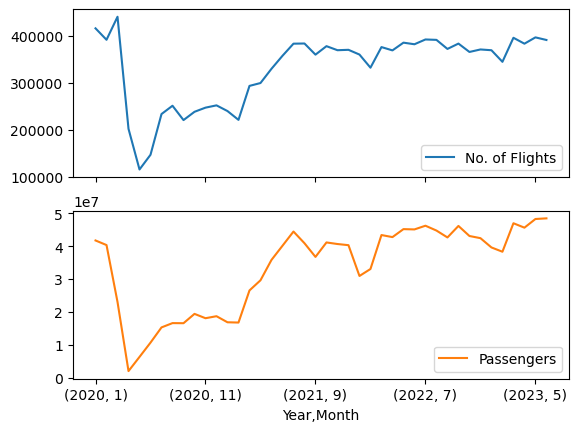

In [298]:
# Plot the number of flights and the number of passengers for every month between
# January of 2020 and December of 2022 
df_monthly_sums = df_year[['Year',
                           'Month',
                           'No. of Flights',
                           'Passengers']].groupby(['Year','Month']).sum()
display(df_monthly_sums)

df_monthly_sums.plot(subplots=True)

Average Delay (Minutes)  Inflation Adjusted Average Fare ($)
Year Month                                                              
2020 1                         9.70                               397.53
     2                        10.92                               397.53
     3                         6.85                               397.53
     4                         3.33                               315.80
     5                         2.79                               315.80
     6                         4.11                               315.80
     7                         5.90                               281.69
     8                         4.93                               281.69
     9                         3.90                               281.69
     10                        5.27                               296.78
     11                        4.97                               296.78
     12                        7.82                               296.78
2021 1                         7.07                               294.41
     2                        10.31                               294.41
     3                         6.56                               294.41
     4                         7.78                               334.41
     5                         9.12                               334.41
     6                        18.06                               334.41
     7                        19.53                               346.10
     8                        17.31                               346.10
     9                        10.34                               346.10
     10                       12.45                               354.91
     11                        9.92                               354.91
     12                       15.30                               354.91
2022 1                        14.37                               351.65
     2                        14.59                               351.65
     3                        15.76                               351.65
     4                        16.77                               414.84
     5                        15.79                               414.84
     6                        18.88                               414.84
     7                        17.44                               393.47
     8                        17.28                               393.47
     9                        11.91                               393.47
     10                       11.07                               403.94
     11                       13.34                               403.94
     12                       20.78                               403.94
2023 1                        17.13                               388.35
     2                        13.96                               388.35
     3                        16.84                               388.35
     4                        18.10                               392.14
     5                        13.24                               392.14
     6                        22.82                               392.14

array([<Axes: xlabel='Year,Month'>, <Axes: xlabel='Year,Month'>],
      dtype=object)

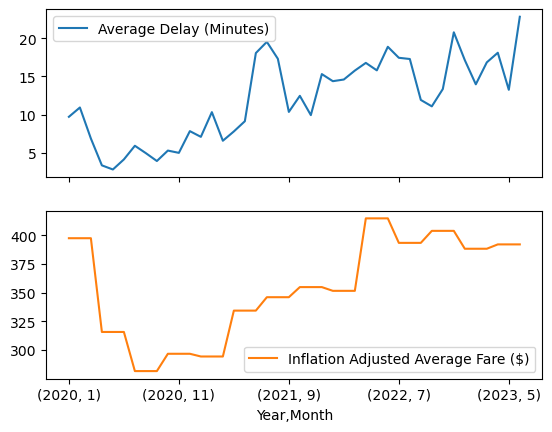

In [299]:
# Plot the average arrival delays and the inflation adjusted airfare by month from
# January of 2020 to December of 2022 
df_monthly_means = df_year[['Year',
                            'Month',
                            'Average Delay (Minutes)',
                            'Inflation Adjusted Average Fare ($)']].groupby(['Year','Month']).mean().round(2)
display(df_monthly_means)

df_monthly_means.plot(subplots=True)

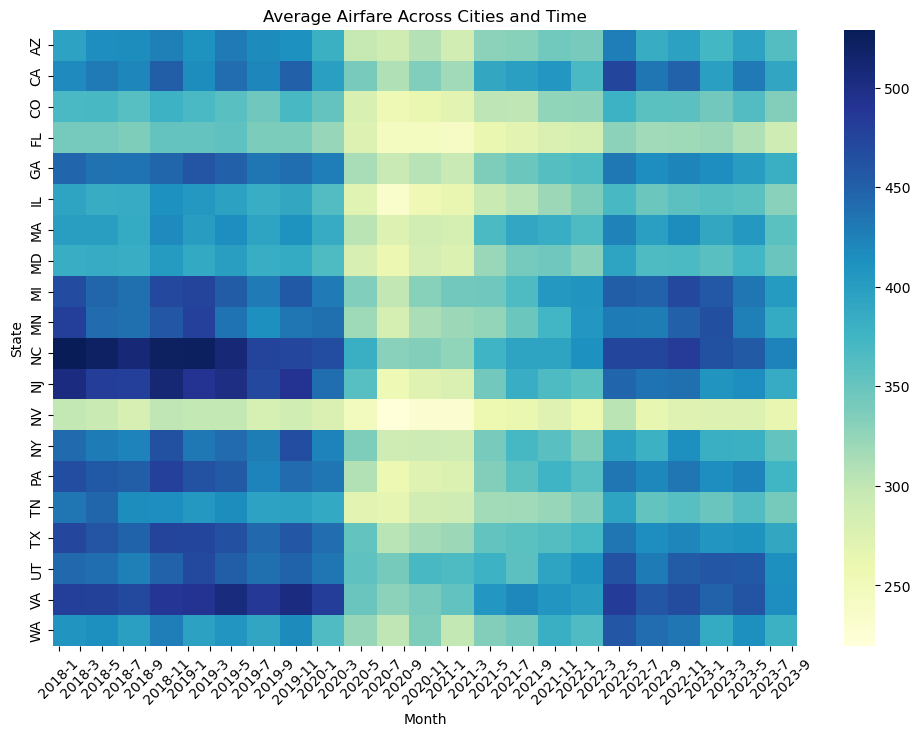

In [302]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_summary.pivot_table(index='State', columns=['Year', 'Month'], values='Inflation Adjusted Average Fare ($)'), cmap='YlGnBu')
plt.title('Average Airfare Across Cities and Time')
plt.xlabel('Month')
plt.ylabel('State')
plt.xticks(rotation=45)
plt.show()

# # Create fare bins
# df_summary['Fare_Bins'] = pd.cut(df_summary['Average_Fare ($)'], bins=[140, 170, 200, 230], labels=['140-170', '171-200', '201-230', '231-260', '261-290', '291-320', '321-350', '351-380', '381-410', '411-440', '441-470'])

# # Pivot table for heatmap
# pivot_table = df_summary.pivot_table(values='Enplaned_Passengers', index='City', columns='Fare_Bins', aggfunc=np.sum)

# # Create the heatmap
# plt.figure(figsize=(10, 6))
# sns.heatmap(pivot_table, annot=True, cmap='coolwarm', fmt="g") # "g" for generic number format
# plt.title('Heatmap of Enplaned Passengers by City and Fare Bins')
# plt.ylabel('City')
# plt.xlabel('Average Fare Bins')
# plt.show()